In [22]:
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)

from framework.bitflip import bitflip_float32

os.chdir(current_dir)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-1,1,1000)

df = pd.DataFrame({"x": x})

for i in range(0,33):
    df[i] = df["x"].apply(lambda x : bitflip_float32(x),i)

df

C:\Users\wwden\AppData\Local\Temp\ipykernel_7252\4258041955.py:10: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df[i] = df["x"].apply(lambda x : bitflip_float32(x),i)
C:\Users\wwden\AppData\Local\Temp\ipykernel_7252\4258041955.py:10: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df[i] = df["x"].apply(lambda x : bitflip_float32(x),i)
C:\Users\wwden\AppData\Local\Temp\ipykernel_7252\4258041955.py:10: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df[i] = df["x"].apply(lambda x : bitflip_float32(x),i)
C:\Users\wwden\AppData\Local\Temp\ipykernel_7252\4258041955.py:10: FutureWarning: the convert_

,x,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,...,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142,-0.288142
1,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,...,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092,-0.073092
2,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,...,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837,-0.955837
3,0.349075,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076,...,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076,0.349076
4,0.750776,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777,...,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777,0.750777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,...,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048,0.409048
996,0.994667,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668,...,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668,0.994668
997,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,...,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491,0.398491
998,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,...,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797,0.105797


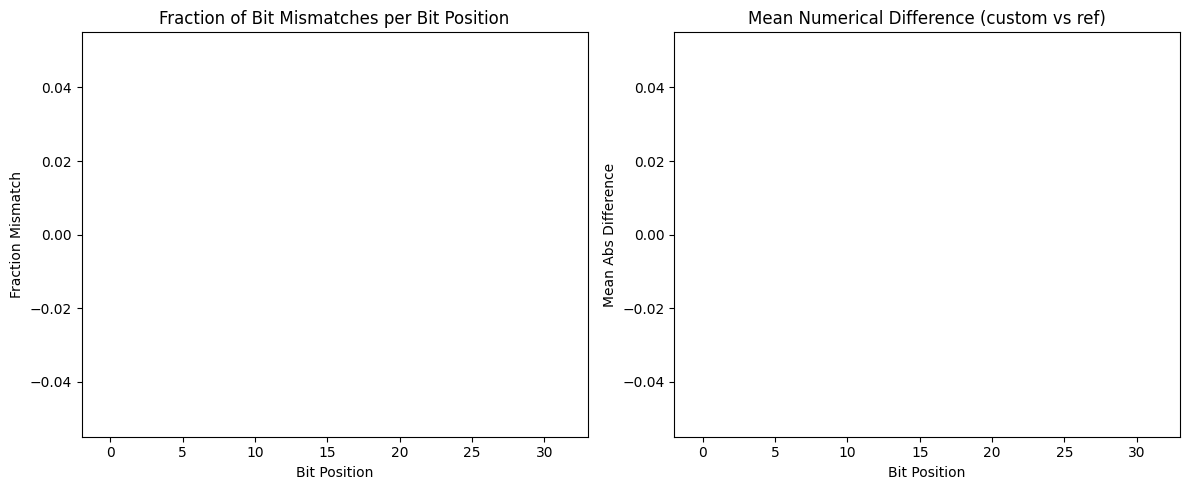

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reference implementation
def bitflip_float32_ref(x, bit):
    bit = 31 - bit
    x_int = np.frombuffer(np.float32(x).tobytes(), dtype=np.uint32)[0]
    x_int ^= 1 << bit
    return np.frombuffer(np.uint32(x_int).tobytes(), dtype=np.float32)[0]

# --- Replace this with your custom version ---
bitflip_float32_custom = bitflip_float32
# ---------------------------------------------

# Generate data
x = np.random.uniform(-1, 1, 1000).astype(np.float32)

# Compare output differences across all bits
bit_diffs = []
numerical_diffs = []

for bit in range(32):
    ref_vals = np.array([bitflip_float32_ref(val, bit) for val in x], dtype=np.float32)
    custom_vals = np.array([bitflip_float32_custom(val, bit) for val in x], dtype=np.float32)

    ref_int = ref_vals.view(np.uint32)
    custom_int = custom_vals.view(np.uint32)

    bit_diff = np.sum(ref_int != custom_int) / len(x)
    bit_diffs.append(bit_diff)

    numerical_diff = np.mean(np.abs(ref_vals - custom_vals))
    numerical_diffs.append(numerical_diff)

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(32), bit_diffs)
plt.title("Fraction of Bit Mismatches per Bit Position")
plt.xlabel("Bit Position")
plt.ylabel("Fraction Mismatch")

plt.subplot(1, 2, 2)
plt.bar(range(32), numerical_diffs)
plt.title("Mean Numerical Difference (custom vs ref)")
plt.xlabel("Bit Position")
plt.ylabel("Mean Abs Difference")

plt.tight_layout()
plt.show()


c:\Repositories\seu-injection-framework\.venv\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\wwden\AppData\Local\Temp\ipykernel_7252\1101264293.py:22: RuntimeWarning: invalid value encountered in subtract
  impact_mid.append(np.mean(np.abs(flipped_mid - x_mid)))


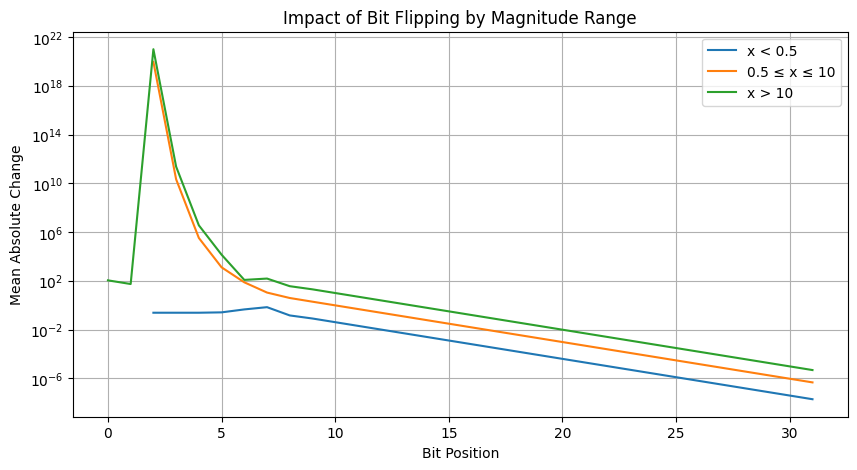

In [54]:
def bitflip_float32(x, bit):
    bit = 31 - bit
    x_uint = np.float32(x).view(np.uint32)
    x_uint ^= 1 << bit
    return x_uint.reshape(1).view(np.float32)[0]

# Generate values
x_small = np.random.uniform(1e-3, 0.5, 1000).astype(np.float32)
x_mid = np.random.uniform(0.5, 10, 1000).astype(np.float32)
x_large = np.random.uniform(10, 100, 1000).astype(np.float32)

impact_small = []
impact_mid = []
impact_large = []

for bit in range(32):
    flipped_small = np.array([bitflip_float32(val, bit) for val in x_small])
    flipped_mid = np.array([bitflip_float32(val, bit) for val in x_mid])
    flipped_large = np.array([bitflip_float32(val, bit) for val in x_large])

    impact_small.append(np.mean(np.abs(flipped_small - x_small)))
    impact_mid.append(np.mean(np.abs(flipped_mid - x_mid)))
    impact_large.append(np.mean(np.abs(flipped_large - x_large)))

plt.figure(figsize=(10, 5))
plt.plot(impact_small, label='x < 0.5')
plt.plot(impact_mid, label='0.5 ≤ x ≤ 10')
plt.plot(impact_large, label='x > 10')
plt.xlabel("Bit Position")
plt.ylabel("Mean Absolute Change")
plt.title("Impact of Bit Flipping by Magnitude Range")
plt.legend()
plt.grid(True)
plt.yscale("log")
plt.show()